<a href="https://colab.research.google.com/github/praveenmarish/artificial_nural_network-/blob/master/work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 16s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model_1 = keras.models.Sequential()
for layer in model.layers:
  model_1.add(layer)

In [0]:
for layer in model_1.layers:
  layer.trainable = False

In [7]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [8]:
model_1._layers.pop()

In [0]:
model_1.add(keras.layers.Dense(2,activation="softmax"))

In [10]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [13]:
!ls
%cd drive/My\ Drive/project/Camera\ Roll/

drive  sample_data
/content/drive/My Drive/project/Camera Roll


In [14]:
!ls

desktop.ini  test  train  validate


In [0]:
train_dir='train'
test_dir='validate'

In [16]:
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
BATCH_SIZE=100
IMG_SHAPE  = 224
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 3 images belonging to 2 classes.


In [17]:
validate_data_gen=image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory=test_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2 images belonging to 2 classes.


In [18]:
epochs=100
history = model_1.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(3 / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validate_data_gen,
    validation_steps=int(np.ceil(2 / float(BATCH_SIZE)))
)

Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 0.6998 - accuracy: 0.0000e+00 - val_loss: 0.7000 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 118ms/step - loss: 0.6996 - accuracy: 0.0000e+00 - val_loss: 0.6996 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 156ms/step - loss: 0.6994 - accuracy: 0.0000e+00 - val_loss: 0.6996 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 111ms/step - loss: 0.6993 - accuracy: 0.0000e+00 - val_loss: 0.6992 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 147ms/step - loss: 0.6991 - accuracy: 0.0000e+00 - val_loss: 0.6990 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 122ms/step - loss: 0.6988 - accuracy: 0.0000e+00 - val_loss: 0.6988 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 110ms/step - loss: 0.6986 - accuracy: 0.0000e+00 - va

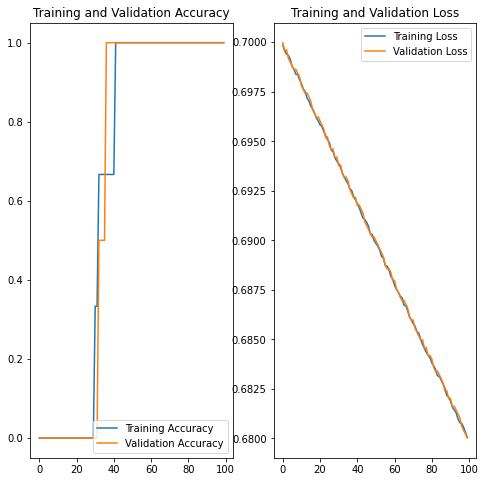

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()